# Introduction :

Today, we will have the **Monty Hall Paradox** a subject to study.

The Monty Hall Paradox is a famous probability puzzle named after Monty Hall, the host of the American television game show "Let's Make a Deal." The paradox can be explained as follows:


# Scenario :

You are a contestant on a game show.

There are three closed doors in front of you, and behind one of these doors is a valuable prize , while the other two doors conceal less desirable prizes.

You are asked to choose one of the three doors, hoping to select the one with the valuable prize behind it.


**Initial Choice:**

You make your initial choice and select one of the doors, say Door #1.


**Host's Action:**

Now, here's where the paradox comes into play.

After you've made your initial choice, the game show host, who knows what is behind each door, opens one of the other two doors that you didn't choose, revealing one of the two less valuable prizes.

**Decision Point:**


At this point, you are presented with a decision: Do you stick with your initial choice (Door #1), or do you switch to the remaining unopened door (the one you didn't pick and wasn't opened by the host)?


# The Paradox:

The paradox lies in the counterintuitive fact that your chances of winning the valuable prize are actually higher if you switch doors rather than sticking with your initial choice.

# The maths behind the paradox :


To understand why this is the case, consider the probabilities involved:


*   
When you initially choose a door, there's a 1/3 chance that you picked the door with the valuable prize behind it (1/3 chance of success) and a 2/3 chance that you picked a door with a goat (2/3 chance of failure).
*   
When the host opens one of the other two doors to reveal a goat, the probability that your initial choice was correct doesn't change. It remains at 1/3. However, the combined probability that one of the other two doors has the prize becomes 2/3 because the host's action provides information about the unchosen doors.
*
When you switch doors, you are essentially betting that your initial choice was wrong (2/3 chance) and that the unopened door (the one you didn't choose) is more likely to contain the prize (2/3 chance). So, switching doors gives you a 2/3 chance of winning, while sticking with your initial choice only has a 1/3 chance of winning.

# The programming side of the paradox :


First we import the needed library

In [18]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

Then, we create our function to initialize the doors :

In [11]:
def initialize_doors():
    # Randomly place the car behind one of the three doors
    doors = np.zeros(3, dtype=int)  # 0 represents a 2nd rate prize
    prize_position = random.randint(0, 2)
    doors[prize_position] = 1  # 1 represents the 1st rate prize
    return doors, prize_position

We add a function that simulates the contestant's choice :

In [12]:
def contestant_choice():
    # Contestant makes their initial choice
    return random.randint(0, 2)

We add a function that simulates the host opening one of the doors :

In [13]:
def host_open_door(doors, contestant_choice):
    # Host opens one of the other doors with a goat
    remaining_unopened_doors = [i for i in range(3) if i != contestant_choice and doors[i] == 0]
    opened_door = random.choice(remaining_unopened_doors)
    return opened_door

We add another function that simulates the other unopened door :

In [14]:
def other_unopened_door(contestant_choice, opened_door):
    # Determine the other unopened door
    return [i for i in range(3) if i != contestant_choice and i != opened_door][0]

And then, we simulate the whole experiment :

In [15]:
# Number of trials for the simulation
num_trials = 100000

# Initialize arrays to store probabilities
stay_probabilities = np.zeros(num_trials)
switch_probabilities = np.zeros(num_trials)

stay_wins = 0
switch_wins = 0

for i in range(num_trials):
    doors, prize_position = initialize_doors()
    initial_choice = contestant_choice()
    opened_door = host_open_door(doors, initial_choice)
    unopened_door = other_unopened_door(initial_choice, opened_door)

    # Check if the contestant wins by staying or switching
    stay_wins += doors[initial_choice]
    switch_wins += doors[unopened_door]

    # Calculate probabilities up to the current trial
    stay_probabilities[i] = stay_wins / (i + 1)
    switch_probabilities[i] = switch_wins / (i + 1)

We save our data in a DataFrame (optional) :

In [16]:
# Create a Pandas DataFrame to store the results
data = {
    "Trial": np.arange(1, num_trials + 1),
    "Stay Probability": stay_probabilities,
    "Switch Probability": switch_probabilities
}
df = pd.DataFrame(data)

And finally we plot out results :

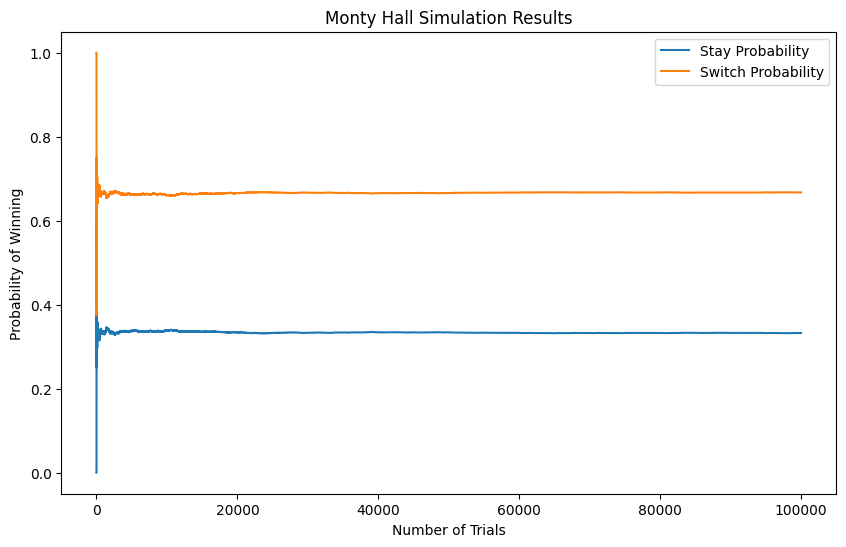

In [17]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df["Trial"], df["Stay Probability"], label="Stay Probability")
plt.plot(df["Trial"], df["Switch Probability"], label="Switch Probability")
plt.xlabel("Number of Trials")
plt.ylabel("Probability of Winning")
plt.legend()
plt.title("Monty Hall Simulation Results")

# Save the plot as a .png file in Google Colab's local storage
plt.savefig("monty_hall_simulation.png")

# Display the plot
plt.show()

And in case you want to download your png image :

In [19]:
# Specify the file
file_name = "monty_hall_simulation.png"

# Trigger the download of the file to your local system
files.download(file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>